<a href="https://colab.research.google.com/github/manojyamasani/AppliedAI_Course_Assignments/blob/main/LSTM_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [205]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [206]:
#!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
#!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

In [207]:
!gdown --id 1Lxf4hqwRUCK0MrNk0n1mOnoVLffEpNAm
!gdown --id 1dUCyNR3_X4p_J8-2FR87ZoSZYlZrNKaL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Lxf4hqwRUCK0MrNk0n1mOnoVLffEpNAm
To: /content/glove_vectors
100% 128M/128M [00:01<00:00, 66.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dUCyNR3_X4p_J8-2FR87ZoSZYlZrNKaL
To: /content/preprocessed_data.csv
100% 124M/124M [00:01<00:00, 92.4MB/s]


## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [208]:
# # https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# input_layer = Input(shape=(n,))
# embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
# flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [209]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import tensorflow as tf
# from tensorflow.keras.layers import Input,Dense,LSTM

In [210]:
#read the csv file
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [211]:
Y=data['project_is_approved']       
X=data.drop('project_is_approved',axis=1)

In [212]:
# perform stratified train test split on the dataset


In [213]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33, stratify=Y, random_state=10)

In [214]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,end=" ")

(73196, 8) (73196,) (36052, 8) (36052,) 

## 1.1 Text Vectorization

In [215]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [216]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['essay'])
vocab_size = len(tokenizer.word_index) + 1
# integer encode the documents
train_encoded_docs = tokenizer.texts_to_sequences(X_train['essay'])
test_encoded_docs = tokenizer.texts_to_sequences(X_test['essay'])

In [217]:
max_length = max([len(seq) for seq in train_encoded_docs])
print(max_length)
train_padded_docs = pad_sequences(train_encoded_docs, maxlen=max_length, padding='post')
test_padded_docs = pad_sequences(test_encoded_docs, maxlen=max_length, padding='post')
print(train_padded_docs.shape)
print(test_padded_docs.shape)
print(train_padded_docs[0][-10:])
print(test_padded_docs[0][-10:])

339
(73196, 339)
(36052, 339)
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [218]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
import pickle
import numpy as np

with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [219]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
	embedding_vector = model.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
print(embedding_matrix[1][:5])

[ 0.15243  -0.16945  -0.022748 -0.25051  -0.15213 ]


## 1.2 Categorical feature Vectorization

In [220]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


In [221]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value=-1)
train_school_state = encoder.fit_transform(X_train['school_state'].to_numpy().reshape(-1,1))
test_school_state = encoder.transform(X_test['school_state'].to_numpy().reshape(-1,1))
no_of_school_state = len(encoder.categories_[0])
print(no_of_school_state)
print(train_school_state.shape)
print(test_school_state.shape)

51
(73196, 1)
(36052, 1)


In [222]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value=-1)
train_project_grade = encoder.fit_transform(X_train['project_grade_category'].to_numpy().reshape(-1,1))
test_project_grade = encoder.transform(X_test['project_grade_category'].to_numpy().reshape(-1,1))
no_of_project_grade = len(encoder.categories_[0])
print(no_of_project_grade)
print(train_project_grade.shape)
print(test_project_grade.shape)

4
(73196, 1)
(36052, 1)


In [223]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value=-1)
train_clean_categories = encoder.fit_transform(X_train['clean_categories'].to_numpy().reshape(-1,1))
test_clean_categories  = encoder.transform(X_test['clean_categories'].to_numpy().reshape(-1,1))
no_of_clean_categories = len(encoder.categories_[0])
print(no_of_clean_categories)
print(train_clean_categories.shape)
print(test_clean_categories.shape)

51
(73196, 1)
(36052, 1)


In [224]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value=-1)
train_clean_subcategories = encoder.fit_transform(X_train['clean_subcategories'].to_numpy().reshape(-1,1))
test_clean_subcategories  = encoder.transform(X_test['clean_subcategories'].to_numpy().reshape(-1,1))
no_of_clean_subcategories = len(encoder.categories_[0])
print(no_of_clean_subcategories)
print(train_clean_subcategories.shape)
print(test_clean_subcategories.shape)

390
(73196, 1)
(36052, 1)


In [225]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value=-1)
train_teacher_prefix = encoder.fit_transform(X_train['teacher_prefix'].to_numpy().reshape(-1,1))
test_teacher_prefix  = encoder.transform(X_test['teacher_prefix'].to_numpy().reshape(-1,1))
no_of_teacher_prefix = len(encoder.categories_[0])
print(no_of_teacher_prefix)
print(train_teacher_prefix.shape)
print(test_teacher_prefix.shape)

5
(73196, 1)
(36052, 1)


## 1.3 Numerical feature Vectorization

In [226]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

#### teacher_number_of_previously_posted_projects

In [227]:
#For z-score normalization the values will be both negative and positive.  
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

train_tchr_prj = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
test_tchr_prj = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

In [228]:
print(train_tchr_prj.shape)
print(test_tchr_prj.shape)
print(list(train_tchr_prj[:5]),'\n',list(test_tchr_prj[:5]))

(73196, 1)
(36052, 1)
[array([0.]), array([0.]), array([0.00686499]), array([0.01372998]), array([0.00228833])] 
 [array([0.]), array([0.00457666]), array([0.01144165]), array([0.]), array([0.])]


#### price

In [229]:
# Min-Max Normalization

scaler = MinMaxScaler()
scaler.fit(X_train['price'].values.reshape(-1, 1))

train_price = scaler.transform(X_train['price'].values.reshape(-1, 1) )
test_price = scaler.transform(X_test['price'].values.reshape(-1, 1) )

In [230]:
print(train_price.shape)
print(test_price.shape)
print(list(train_price[:5]),'\n',list(test_price[:5]))

(73196, 1)
(36052, 1)
[array([0.04193709]), array([0.00367662]), array([0.04999345]), array([0.00822339]), array([0.02445013])] 
 [array([0.03598608]), array([0.00793134]), array([0.0147705]), array([0.00776031]), array([0.00135323])]


In [231]:
numerical_data_train = np.concatenate((train_tchr_prj,train_price),axis=1)
numerical_data_test = np.concatenate((test_tchr_prj,test_price),axis=1)
print(numerical_data_train.shape)
print(numerical_data_test.shape)

(73196, 2)
(36052, 2)


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [232]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image.

In [269]:
from tensorflow.keras import layers,Input,Model
from keras.backend import cast

# Hyper Parameters
Embedding_vector_size_text = 300
categorical_ftr_embedding_size = 10
max_seq_length = max_length
no_of_lstm_units_on_text = 100
no_of_Dense_units_on_numerical_ftr = 100
no_of_units_on_dense_layer1 = 128
no_of_units_on_dense_layer2 = 64
no_of_units_on_dense_layer3 = 32
no_of_units_on_output_dense_layer = 1

categories_dim = 1
numerical_ftr_dim = 2
Dropout_rate = 0.3

vocab_size_text = vocab_size
vocab_size_school_state = no_of_school_state
vocab_size_project_grade = no_of_project_grade
vocab_size_input_clean = no_of_clean_categories
vocab_size_input_clean_sub = no_of_clean_subcategories
vocab_size_teacher_prefix = no_of_teacher_prefix

Embedding_vector_size_ss = vocab_size_school_state
Embedding_vector_size_pg = vocab_size_project_grade
Embedding_vector_size_cleancat = vocab_size_input_clean
Embedding_vector_size_clean_subcat = vocab_size_input_clean_sub
Embedding_vector_size_teacher_prefix = vocab_size_teacher_prefix

def Create_model():
  # Text Feature block
  input1 = Input(shape = (max_seq_length,),name = "Text_Input")
  x = layers.Embedding(input_dim = vocab_size_text,output_dim=Embedding_vector_size_text,input_length = max_seq_length,weights=[embedding_matrix], name = "Text_Embedding_layer", trainable = False)(input1)
  x = layers.LSTM(no_of_lstm_units_on_text, name = "Text_LSTM")(x)
  text_lstm_output = layers.Flatten(name = "Output_from_text_lstm")(x)

  # Categorical feature school_state block
  input2 = Input(shape = (categories_dim,),name = "School_state_Input")
  x = layers.Embedding(input_dim = vocab_size_school_state,output_dim=Embedding_vector_size_ss, input_length = 1,name = "School_state_Embedding_layer")(input2)
  school_state_output = layers.Flatten(name = "school_state_output")(x)

  # Categorical feature project_grade block
  input3 = Input(shape = (categories_dim,),name = "project_grade_Input")
  x = layers.Embedding(input_dim = vocab_size_project_grade,output_dim=Embedding_vector_size_pg, input_length = 1,name = "Project_grade_Embedding_layer")(input3)
  project_grade_output = layers.Flatten(name = "project_grade_output")(x)

  # Categorical feature input_clean_categories block
  input4 = Input(shape = (categories_dim,),name = "input_clean_categories_Input")
  x = layers.Embedding(input_dim = vocab_size_input_clean,output_dim=Embedding_vector_size_cleancat, input_length = 1,name = "Clean_categories_Embedding_layer")(input4)
  clean_cat_output = layers.Flatten(name = "clean_cat_output")(x)

  # Categorical feature input_clean_subcategories block
  input5 = Input(shape = (categories_dim,),name = "input_clean_subcategories_Input")
  x = layers.Embedding(input_dim = vocab_size_input_clean_sub,output_dim=Embedding_vector_size_clean_subcat, input_length = 1,name = "Clean_subcategories_Embedding_layer")(input5)
  clean_subcat_output = layers.Flatten(name = "clean_subcat_output")(x)

  # Categorical feature teacher_prefix block
  input6 = Input(shape = (categories_dim,),name = "teacher_prefix_Input")
  x = layers.Embedding(input_dim = vocab_size_teacher_prefix,output_dim=Embedding_vector_size_teacher_prefix, input_length = 1,name = "Teacher_prefix_Embedding_layer")(input6)
  teacher_prefix_output = layers.Flatten(name = "teacher_prefix_output")(x)

  # Numerical features block  
  input7 = Input(shape = (numerical_ftr_dim,),name = "numerical_ftrs_Input")
  numerical_ftr_output = layers.Dense(no_of_Dense_units_on_numerical_ftr, activation='relu')(input7)

  concat_output = layers.Concatenate(axis=1)([text_lstm_output, school_state_output, project_grade_output,
                                              clean_cat_output, clean_subcat_output, teacher_prefix_output,
                                              numerical_ftr_output])

  dense_layer1_after_concat = layers.Dense(no_of_units_on_dense_layer1, activation = 'relu')(concat_output)
  dropout_layer1 = layers.Dropout(Dropout_rate)(dense_layer1_after_concat)

  dense_layer2_after_concat = layers.Dense(no_of_units_on_dense_layer2, activation = 'relu')(dropout_layer1)
  dropout_layer2 = layers.Dropout(Dropout_rate)(dense_layer2_after_concat)

  dense_layer3_after_concat = layers.Dense(no_of_units_on_dense_layer3, activation = 'relu')(dropout_layer2)
  output = layers.Dense(no_of_units_on_output_dense_layer, activation = 'softmax')(dense_layer3_after_concat)

  return Model(inputs = [input1,input2,input3,input4,input5,input6,input7],outputs = output, name = "Model_1")

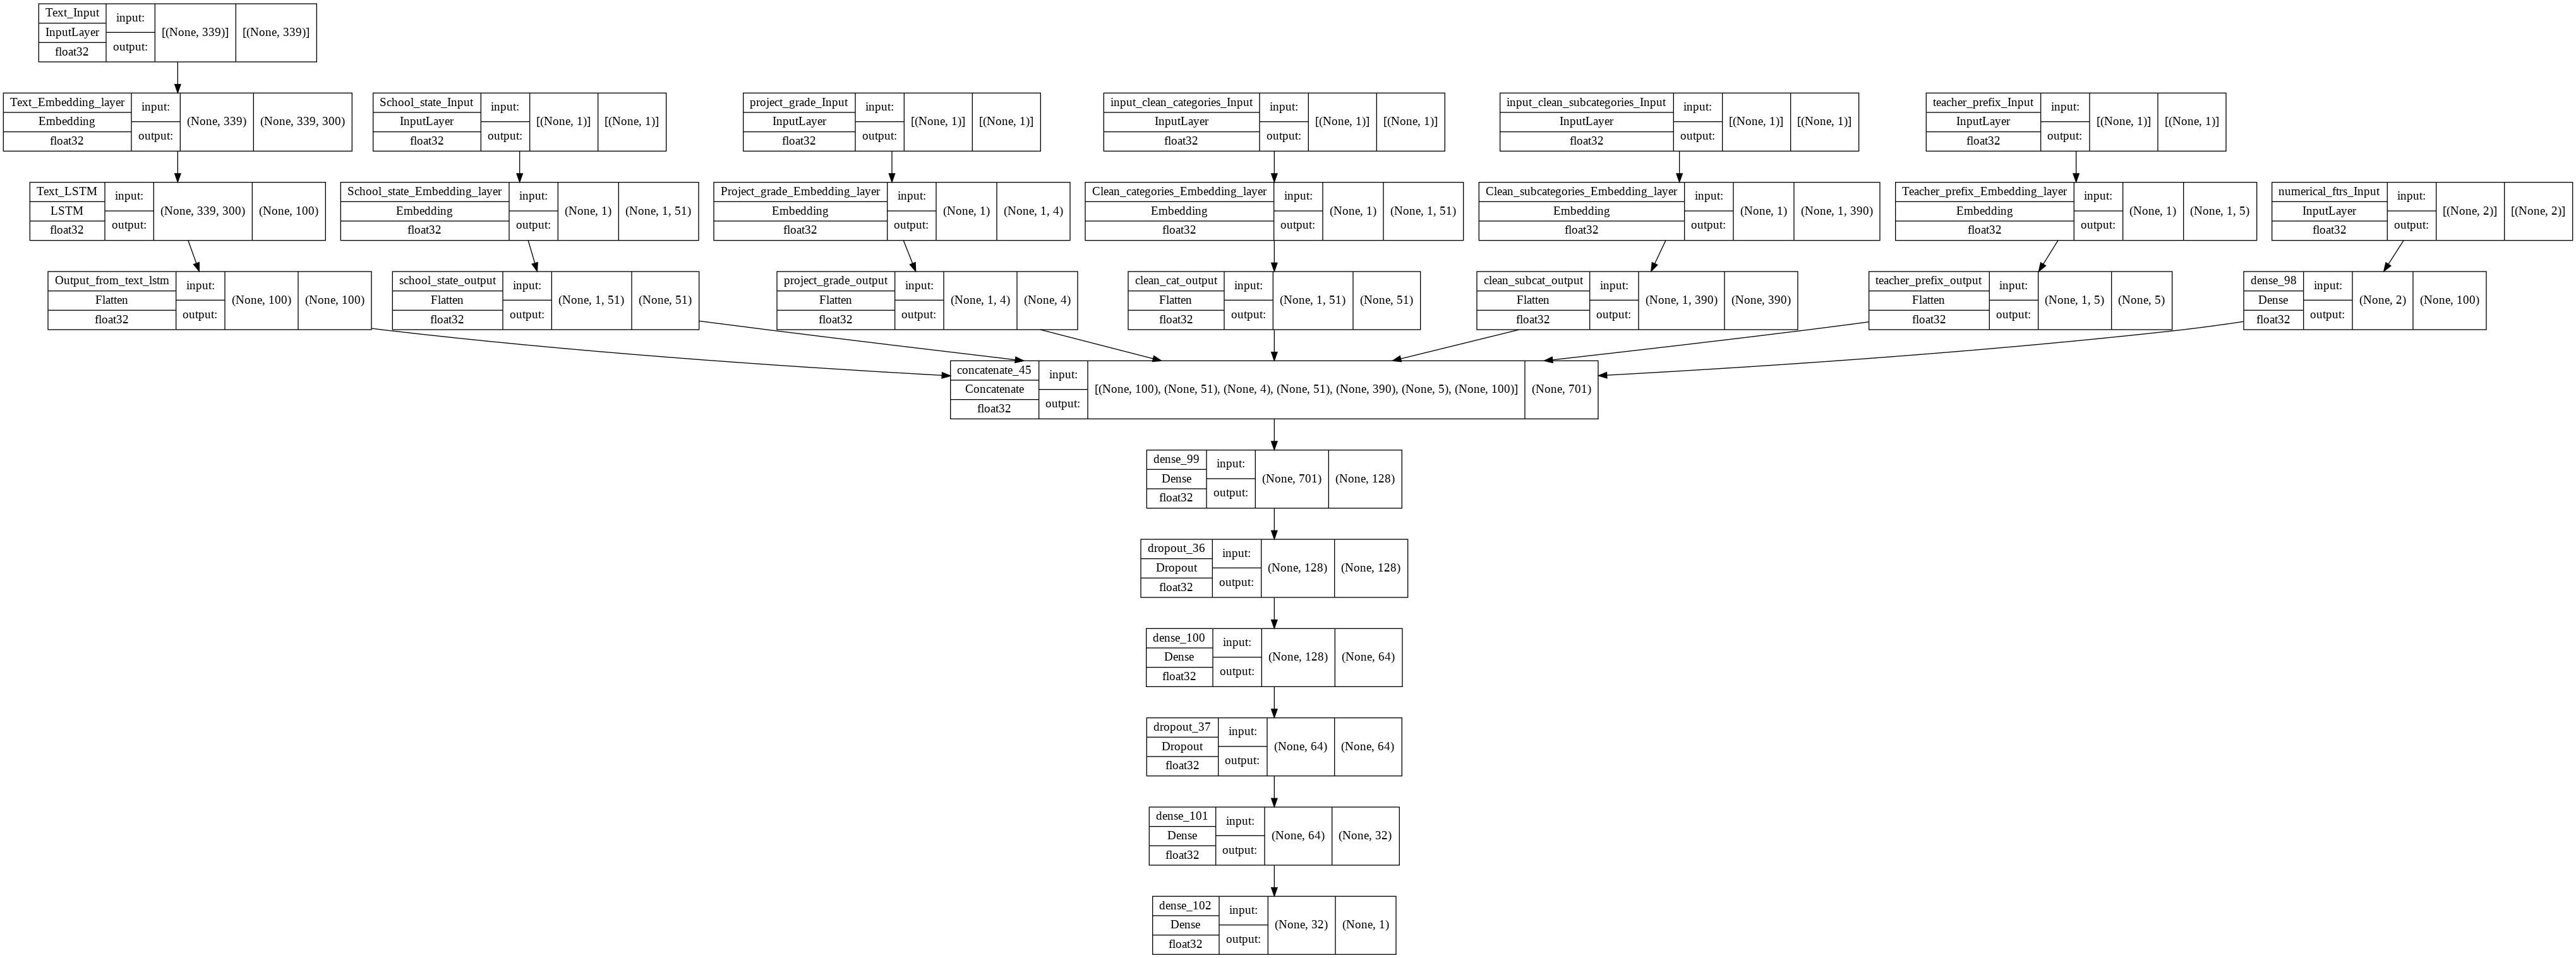

In [270]:
from tensorflow.keras import utils
model = Create_model()

# model.summary()
utils.plot_model(model, "Model_1.png", show_shapes=True,show_dtype = True)

## 1.5 Compiling and fititng your model

In [ ]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.